In [60]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt

In [61]:
url = 'http://apis.data.go.kr/1360000/AsosHourlyInfoService/getWthrDataList'
service_key='olagdtOMmxo/SGViApo7KMrckkJA4LTnnQuWlhzeWv0+3gHV6RA8o+YAKxvQBy+juX4G4aAfN2Pl29K69jWi8w=='

queryParams = '?' + urlencode({quote_plus('ServiceKey') : service_key,
                               quote_plus('pageNo') : '1',
                               quote_plus('numOfRows') : '720',
                               quote_plus('dataType') : 'JSON',
                               quote_plus('dataCd') : 'ASOS', 
                               quote_plus('dateCd') : 'HR', 
                               quote_plus('startDt') : '20220101', #시작날짜
                               quote_plus('startHh') : '01',
                               quote_plus('endDt') : '20220131', #종료날짜
                               quote_plus('endHh') : '01',
                               quote_plus('stnIds') : '108' }) # 지역코드

# 서울 108 , 파주 99

response = urlopen(url + queryParams)
json_api = response.read().decode("utf-8")

In [62]:
json_file = json.loads(json_api)
df=json_normalize(json_file['response']['body']['items']['item'])

<ipython-input-62-1867b7961127>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df=json_normalize(json_file['response']['body']['items']['item'])


In [63]:
df

,tm,rnum,stnId,stnNm,ta,taQcflg,rn,rnQcflg,ws,wsQcflg,...,lcsCh,vs,gndSttCd,dmstMtphNo,ts,tsQcflg,m005Te,m01Te,m02Te,m03Te
0,2022-01-01 01:00,1,108,서울,-9.2,,,,1.8,,...,,2000,,,-7.2,,-1.1,-1.1,-0.2,1.0
1,2022-01-01 02:00,2,108,서울,-9.5,,,,1.2,,...,,2000,,,-7.5,,-1.3,-1.2,-0.2,1.0
2,2022-01-01 03:00,3,108,서울,-9.3,,,,1.4,,...,,2000,,,-7.6,,-1.4,-1.2,-0.2,1.0
3,2022-01-01 04:00,4,108,서울,-9.6,,,,1.7,,...,,2000,,,-7.6,,-1.4,-1.3,-0.3,1.0
4,2022-01-01 05:00,5,108,서울,-9.7,,,,0.8,,...,,2000,,,-7.7,,-1.5,-1.4,-0.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2022-01-30 20:00,716,108,서울,-0.9,,,,1.0,,...,,2000,,,-2.4,,-0.1,-0.6,-0.5,0.1
716,2022-01-30 21:00,717,108,서울,-1.2,,,,3.6,,...,,2000,,,-2.8,,-0.1,-0.6,-0.5,0.1
717,2022-01-30 22:00,718,108,서울,-2.1,,,,2.7,,...,,2000,,,-3.4,,-0.2,-0.6,-0.5,0.1
718,2022-01-30 23:00,719,108,서울,-2.8,,,,2.5,,...,,2000,,,-4.0,,-0.2,-0.6,-0.5,0.1


Text(0.5, 1.0, 'temp data')

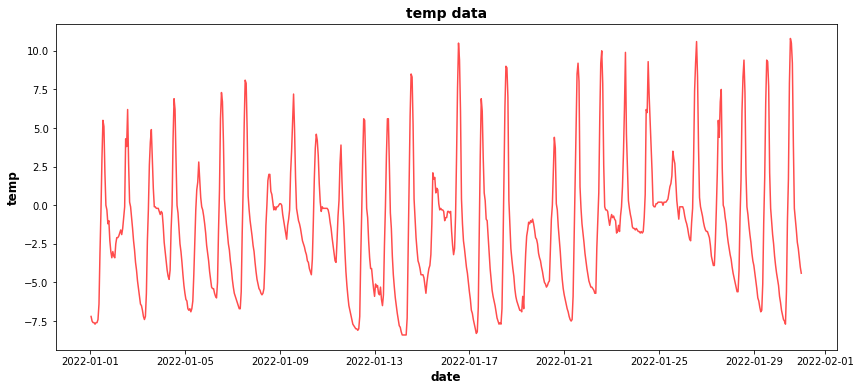

In [64]:
df['tm']=pd.to_datetime(df['tm'])
df['ts'] = pd.to_numeric(df['ts'], downcast='float')

fig = plt.figure(figsize=(14,6))
ax = plt.subplot(1,1,1)

ax.plot(df['tm'],df['ts'],color='r',lw=1.5,alpha=0.7)
ax.set_ylabel('temp', fontweight='bold', fontsize=12)
ax.set_xlabel('date', fontweight='bold', fontsize=12)
ax.set_title('temp data', fontweight = 'bold',fontsize = 14)